In [1]:
## Importacíón librerias

import pandas as pd
import numpy as np
from src import soporte_funciones as spt

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Creación dataframes: 

In [3]:
df_activity = pd.read_csv('files/Customer Flight Activity.csv')
df_activity.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [4]:
df_loyalty = pd.read_csv('files/Customer Loyalty History.csv')
df_loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


# Fase 1: Exploración y Limpieza

## Exploración inicial

### Exploración DF Flight Activity

In [5]:
# Columnas y filas: 
print(f"El número de filas que tenemos en el DF de 'Customer Flight Activity' es: {df_activity.shape[0]}, y el número de columnas es: {df_activity.shape[1]}")

El número de filas que tenemos en el DF de 'Customer Flight Activity' es: 405624, y el número de columnas es: 10


In [6]:
#Nombres de columnas: 
print(f"""Los nombres de las columnas que tenemos en el DF de 'Customer Flight Activity son:
       {df_activity.columns}""")


Los nombres de las columnas que tenemos en el DF de 'Customer Flight Activity son:
       Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [7]:
#Info general: 
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
#Llamamos a la función de exploración del DF: 
spt.exploracion(df_activity)

El DataFrame tiene 405624 filas y 10 columnas.
Tiene 1864 datos duplicados, lo que supone un porcentaje de 0.46% de los datos. 

Hay 0 columnas con datos nulos, y son: 
[]

y sin nulos hay 10 columnas y son: 
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,22
Flights with Companions,0.0%,100.0%,int64,12



El dataframe no tiene columnas categóricas. 

Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,22
Flights with Companions,0.0%,100.0%,int64,12
Total Flights,0.0%,100.0%,int64,33
Distance,0.0%,100.0%,int64,4746
Points Accumulated,0.0%,100.0%,float64,1549
Points Redeemed,0.0%,100.0%,int64,587
Dollar Cost Points Redeemed,0.0%,100.0%,int64,49


### Exploración DF Loyalty History

In [9]:
# Columnas y filas: 
print(f"El número de filas que tenemos en el DF de 'Customer Loyalty History' es: {df_loyalty.shape[0]}, y el número de columnas es: {df_loyalty.shape[1]}")

El número de filas que tenemos en el DF de 'Customer Loyalty History' es: 16737, y el número de columnas es: 16


In [10]:
#Nombres de columnas: 
print(f"""Los nombres de las columnas que tenemos en el DF de 'Customer Loyalty History' son:
       {df_loyalty.columns}""")

Los nombres de las columnas que tenemos en el DF de 'Customer Loyalty History' son:
       Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


In [11]:
#Info general: 
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [12]:
#Llamamos a la función de exploración del DF: 
spt.exploracion(df_loyalty)

El DataFrame tiene 16737 filas y 16 columnas.
Tiene 0 datos duplicados, lo que supone un porcentaje de 0.0% de los datos. 

Hay 3 columnas con datos nulos, y son: 
['Salary', 'Cancellation Year', 'Cancellation Month']

y sin nulos hay 13 columnas y son: 
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Country,0.0%,100.0%,object,1
Province,0.0%,100.0%,object,11
City,0.0%,100.0%,object,29
Postal Code,0.0%,100.0%,object,55


Principales estadísticos de las columnas categóricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Country,0.0%,100.0%,object,1
Province,0.0%,100.0%,object,11
City,0.0%,100.0%,object,29
Postal Code,0.0%,100.0%,object,55
Gender,0.0%,100.0%,object,2
Education,0.0%,100.0%,object,5
Salary,25.32%,74.68%,float64,5890
Marital Status,0.0%,100.0%,object,3
Loyalty Card,0.0%,100.0%,object,3


### Gestión duplicados

In [13]:
## contamos total duplicados: 
df_activity.duplicated().sum() 

1864

In [14]:
## verificamos qué columnas tienen datos duplicados
columnas_duplicadas = []
for columna in df_activity.columns:
    if df_activity[columna].duplicated().any():
        columnas_duplicadas.append(columna)

In [15]:
columnas_duplicadas

['Loyalty Number',
 'Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

In [16]:
## Verificamos cuantos valores "duplicados" hay en la columna 'Loyalty Number' que sería como el customer ID: 
df_activity['Loyalty Number'].duplicated().sum()

388887

In [17]:
## Verificamos cuantos valores únicos hay en la columna 'Loyalty Number'
len(df_activity['Loyalty Number'].unique())

16737

In [18]:
## DF con filas duplicadas (incluyendo la original)
filas_duplicadas = df_activity[df_activity.duplicated(keep=False)]

In [19]:
filas_duplicadas.tail(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
404667,949628,2018,12,0,0,0,0,0.0,0,0
404668,949628,2018,12,0,0,0,0,0.0,0,0
404883,960050,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405110,971370,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0
405437,989528,2018,12,0,0,0,0,0.0,0,0


In [20]:
##pd.set_option('display.max_rows', None)

In [21]:
## Verificamos si desde columna Flights Booked hasta Dollar Cost Points Redeemed todos los valores son 0: 
for col in filas_duplicadas:

    print(f'Para la columna "{col}" estos son los valores unicos: {filas_duplicadas[col].unique()}')

Para la columna "Loyalty Number" estos son los valores unicos: [101902 112142 126100 130331 135421 156031 106509 193662 208241 224676
 237094 243741 263267 304600 308480 322169 328623 342569 342945 351937
 354438 357901 361680 368073 369638 373638 402697 403529 407404 411030
 417240 455758 460272 464256 465260 467894 470998 474305 486860 488224
 497476 510182 511862 536021 546259 547522 577232 584782 584833 593252
 601131 604274 622975 642020 646756 653081 678205 687951 693926 702482
 710003 719633 727507 732304 741848 746226 750578 750665 762990 773857
 774168 776466 783165 790940 819842 825593 831341 849813 869265 869276
 874780 886803 890361 896861 897772 903359 920175 949628 950304 950980
 951353 958491 960050 979115 981508 989528 990512 215508 295906 585756
 841296 899760 992168 255836 411523 206050 114414 615561 684123 775768
 971370 198499 255475 278854 351615 279419 615439 825517 972686 309230
 323821 411734 434807 444092 927026 738567 902608 965605 650466 876062
 361237 528447

In [22]:
## Los valores duplicados parecen ser redundantes. Se repite en una o más ocasiones el mismo Loyalty Number, Año y Mes - pero el resto de los valores de las columnas es de 0. Por lo que eliminamos los duplicados. 
## Guardamos guardados en un DF (filas_duplicadas) y los pasamos a CSV por si en un futuro hay que restaurarlos: 

filas_duplicadas.to_csv("filas_duplicadas.csv", index=False)

In [23]:
#Eliminación duplicados: 
df_activity_sin_duplicados = df_activity.drop_duplicates(keep='first')

In [24]:
## Verificamos que no haya duplicados y cantidad total de filas (debería haber)
df_activity_sin_duplicados.duplicated().sum()

0

In [25]:
## Antes tenía 405624 filas. Eliminamos 1864 datos duplicados. El total debería ser 403760.
df_activity_sin_duplicados.shape[0]

403760

In [26]:
## Comprobamos que en los casos que tenga el mismo loyalty number el resto de las columnas no sean iguales: 

df_activity_sin_duplicados.sort_values('Loyalty Number')

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
46353,100018,2018,10,6,4,10,3110,311.0,385,31
321119,100018,2018,8,0,0,0,0,0.0,0,0
270416,100018,2018,5,0,0,0,0,0.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0
...,...,...,...,...,...,...,...,...,...,...
16900,999986,2017,1,1,0,1,1849,184.0,0,0
140741,999986,2018,8,8,1,9,3672,367.0,655,53
135207,999986,2017,8,12,0,12,1716,171.0,0,0
33801,999986,2017,2,7,0,7,3017,301.0,0,0


### Union de datos

In [27]:
## Comprobamos el shape y las columnas nuevamente: 

In [28]:
df_activity_sin_duplicados.shape

(403760, 10)

In [29]:
df_activity_sin_duplicados.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [30]:
df_loyalty.shape

(16737, 16)

In [31]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [32]:
## Utilizamos un merge ya que ambos DF tienen la columna 'Loyalty Number': 
## Seleccionamos el tipo inner para que devuelva solo las filas que tienen coincidencias en ambos DF en la columna 'Loyalty Number' (para evitar tener nulos o data incompleta) -- igualmente el outer merge daba el mismo shape. 
df_merged = df_activity_sin_duplicados.merge(df_loyalty, how='inner', on='Loyalty Number')
df_merged.shape

(403760, 25)

In [33]:
## Comprobación forma outer merge: 
## df_merged_outer = df_activity_sin_duplicados.merge(df_loyalty, how='outer', on='Loyalty Number')
## df_merged_outer.shape


In [34]:
df_merged.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
5,100301,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.0,Divorced,Nova,48356.96,Standard,2013,9,NaN,NaN
6,100364,2017,1,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.0,Married,Nova,5143.88,Standard,2015,5,NaN,NaN
7,100380,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,69695.0,Single,Star,2465.62,Standard,2012,10,NaN,NaN
8,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN
9,100504,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018.0,3.0


## Limpieza de Datos:

In [35]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


#### Gestion de nulos: 

In [36]:
# Ver porcentaje de nulos por columna: 

porc_nulos = (df_merged.isnull().sum() / df_merged.shape[0]) * 100
porc_nulos

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Mon

In [37]:
# la lista de columnas numericas que tienen nulos: 
nulos_esta_num = df_merged[df_merged.columns[df_merged.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


In [38]:
## Ver el número de nulos que tenemos en cada una de las columnas numericas
df_merged[nulos_esta_num].isnull().sum() / df_merged.shape[0] 

Salary                0.253269
Cancellation Year     0.877031
Cancellation Month    0.877031
dtype: float64

In [73]:
## 1) Cancellation Year: "Año en que el cliente canceló su membresía en el programa de lealtad, si aplica" --> 
# Estimamos que al estar nulo el cliente aun no ha cancelado, por lo que dejamos el valor nulo por si en algún momento (cuando el cliente cancele) es necesario rellenarlo
## 2)Cancellation Month: "Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica" --> 
# Estimamos que al estar nulo el cliente aun no ha cancelado, por lo que dejamos el valor nulo por si en algún momento (cuando el cliente cancele) es necesario rellenarlo

In [ ]:
## 3) Salary: Ingreso anual estimado del cliente

In [40]:
## Verificar valores por orden en la columna salario: 
df_merged['Salary'].sort_values()

185893   -58486.0
219532   -58486.0
956      -58486.0
320510   -58486.0
101795   -58486.0
           ...   
403747        NaN
403749        NaN
403752        NaN
403755        NaN
403758        NaN
Name: Salary, Length: 403760, dtype: float64

Antes de continuar con la gestión de nulos de la columna Salary, resolvemos valores negativos: 

In [41]:
## Verificamos cuáles son los valores negativos: 
df_negativos = df_merged[df_merged['Salary'] < 0]

In [42]:
df_negativos['Salary'].value_counts().sort_values(ascending=True)

Salary
-10605.0    24
-49001.0    24
-46683.0    24
-47310.0    24
-39503.0    24
-9081.0     24
-17534.0    24
-43234.0    24
-45962.0    24
-49830.0    24
-19325.0    24
-19332.0    24
-46303.0    24
-34079.0    24
-57297.0    24
-12497.0    24
-26322.0    24
-58486.0    24
-31911.0    24
-46470.0    24
Name: count, dtype: int64

In [43]:
## Exploramos el df de los negativos para intentar encontrar algún patrón o motivo del error: 
spt.exploracion(df_negativos)

El DataFrame tiene 480 filas y 25 columnas.
Tiene 0 datos duplicados, lo que supone un porcentaje de 0.0% de los datos. 

Hay 2 columnas con datos nulos, y son: 
['Cancellation Year', 'Cancellation Month']

y sin nulos hay 23 columnas y son: 
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,20
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,22
Flights with Companions,0.0%,100.0%,int64,12


Principales estadísticos de las columnas categóricas:


,count,unique,top,freq
Country,480,1,Canada,480
Province,480,6,Quebec,144
City,480,14,Toronto,72
Postal Code,480,18,A1C 6H9,48
Gender,480,2,Male,240
Education,480,2,Bachelor,456
Marital Status,480,3,Married,360
Loyalty Card,480,3,Nova,216
Enrollment Type,480,1,2018 Promotion,480


Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,480.0,468736.900000,246776.560781,115505.00,238155.00,433242.50,634692.7500,959977.0
Year,480.0,2017.500000,0.500522,2017.00,2017.00,2017.50,2018.0000,2018.0
Month,480.0,6.500000,3.455654,1.00,3.75,6.50,9.2500,12.0
Flights Booked,480.0,3.691667,5.403619,0.00,0.00,0.00,7.0000,21.0
Flights with Companions,480.0,0.802083,1.971720,0.00,0.00,0.00,0.0000,11.0
Total Flights,480.0,4.493750,6.609916,0.00,0.00,0.00,9.0000,32.0
Distance,480.0,1030.712500,1444.024243,0.00,0.00,0.00,2033.0000,5746.0
Points Accumulated,480.0,105.434750,147.335863,0.00,0.00,0.00,208.0625,574.0
Points Redeemed,480.0,19.800000,106.973401,0.00,0.00,0.00,0.0000,814.0
Dollar Cost Points Redeemed,480.0,1.600000,8.637830,0.00,0.00,0.00,0.0000,66.0


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,20
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,22
Flights with Companions,0.0%,100.0%,int64,12
Total Flights,0.0%,100.0%,int64,29
Distance,0.0%,100.0%,int64,194
Points Accumulated,0.0%,100.0%,float64,170
Points Redeemed,0.0%,100.0%,int64,17
Dollar Cost Points Redeemed,0.0%,100.0%,int64,15


In [44]:
## Es posible que el error solo se haya producido en los unique values de loyalty customer. Pasamos esos ID a lista: 
id_negativos = list(df_negativos['Loyalty Number'].unique())
id_negativos

[115505,
 152016,
 194065,
 212128,
 232755,
 239955,
 347013,
 366599,
 430398,
 491242,
 525245,
 542976,
 603070,
 729561,
 734647,
 790475,
 906428,
 959977,
 364596,
 436087]

In [45]:
## Filtramos el DF original para que solo aparezcan los loyalty customer de la lista anterior: 
df_filtrado = df_merged[df_merged['Loyalty Number'].isin(id_negativos)]
df_filtrado.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN


In [46]:
df_filtrado.shape

(480, 25)

In [47]:
df_negativos.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN


In [48]:
df_negativos.shape

(480, 25)

In [49]:
## Como los DF coinciden y los salarios negativos parecen ser debido a un error de inserción en esos Loyalty customer ID, pero las cifras parecen correctas (misma cantidad de digitos que los salarios positivos)
## Transformamos salarios en DF original a positivo: 
df_merged['Salary'] = df_merged['Salary'].apply(spt.negativos)

In [50]:
## Comprobamos el cambio
df_merged['Salary'].min()

9081.0

Continuamos con gestión de nulos de la columna Salary: 

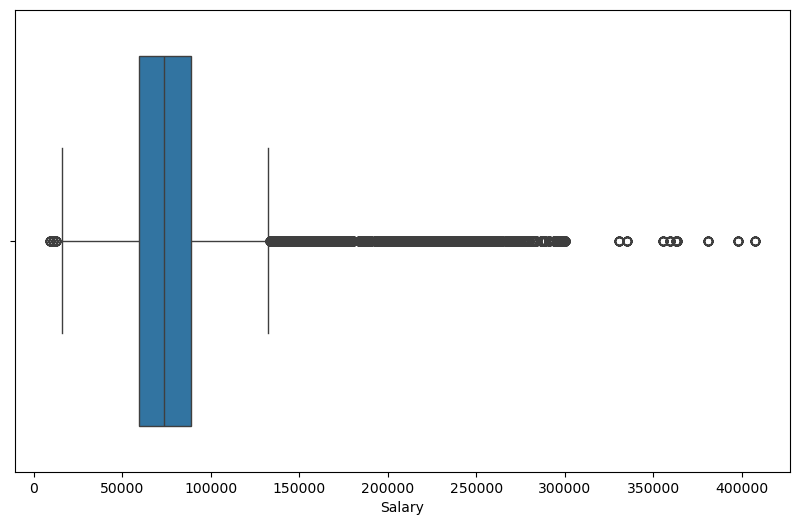

<Figure size 640x480 with 0 Axes>

In [51]:
## Verificamos si hay datos atípicos:

fig, ax = plt.subplots(figsize=(10, 6))

# Genera el boxplot para la columna especificada
sns.boxplot(x='Salary', data=df_merged, ax=ax)

# Muestra el gráfico
plt.show()
plt.tight_layout();

In [52]:
## Calculamos promedios de Salary por cada nivel de Education
promedios_salarios = df_merged.groupby('Education')['Salary'].mean()
promedios_salarios 

Education
Bachelor                 72599.080913
College                           NaN
Doctor                  178403.675202
High School or Below     61146.378165
Master                  103734.523724
Name: Salary, dtype: float64

In [53]:
## Verificamos si todos los nulos de la columna Salario tienen Education type College: 

In [54]:
nulos_por_education = df_merged['Salary'].isnull().groupby(df_merged['Education']).sum()
nulos_por_education

Education
Bachelor                     0
College                 102260
Doctor                       0
High School or Below         0
Master                       0
Name: Salary, dtype: int64

In [55]:
df_merged['Salary'].isnull().sum()

102260

In [56]:
## Conclusión: los nulos de la categoria 'Salary' son todos de 'Education' = 'College'

In [57]:
## Como hay algunos valores atipicos, comparamos con los métodos de Iterative Imputer y KNN para ver cuál es el que mejor se adecua: 

In [58]:
## Creamos copy del DF para ver las nuevas columnas: 
df_copia = df_merged.copy()
df_copia.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [59]:
# Iterative: 
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["Salary"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

In [60]:
df_copia[["Salary_iterative"]] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[["Salary_iterative"]].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
Salary_iterative    0
dtype: int64 nulos


In [61]:
## KNN: 

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Salary"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

In [ ]:
# añadimos el array al DataFrame 
df_copia[["Salary_knn"]] = imputer_knn_imputado

# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_copia[["Salary_knn"]].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
Salary_knn    0
dtype: int64 nulos


In [63]:
## Comparamos los resultados: 

df_copia.describe()[["Salary","Salary_iterative", "Salary_knn"]]

,Salary,Salary_iterative,Salary_knn
count,301500.000000,403760.000000,403760.000000
mean,79371.732902,79371.732902,79371.732902
std,34726.433958,30008.343196,30008.343196
min,9081.000000,9081.000000,9081.000000
25%,59262.000000,63901.000000,63901.000000
50%,73479.000000,79371.732902,79371.732902
75%,88606.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [64]:
# Como los resultados son similares, proseguimos con Iterative y eliminamos las columnas innecesarias (KNN y salario original ya que tiene nulos)

df_copia.drop(["Salary_knn", "Salary" ], axis = 1, inplace = True)

# ahora vamos a cambiar el nombre de la columna que de iterative para que tengan el mismo nombre de origen (salary)
nuevo_nombre = {"Salary_iterative": "Salary"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [65]:
## Comprobamos que salary no tenga nulos: 
df_copia['Salary'].isnull().sum()

0

In [68]:
df_copia['Salary'].head(2)

0    92552.000000
1    79371.732902
Name: Salary, dtype: float64

In [ ]:
## Redondear a dos decimales: 

df_copia['Salary'] = df_copia['Salary'].round(2)

In [72]:
df_copia['Salary'].head(2)

0    92552.00
1    79371.73
Name: Salary, dtype: float64

In [74]:
## Reemplazamos espacios por guiones bajos y pasamos a minuscula para homogeneizar: 

df_copia = spt.espacios_guion_bajo(df_copia)

In [ ]:
## Verificamos tipos de datos
df_copia.dtypes

loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year              float64
cancellation_month             float64
salary                         float64
dtype: object

In [77]:
## Cambiamos cancellation_year / cancellation_month de float a entero: 

df_copia = spt.entero(df_copia, 'cancellation_year')
df_copia = spt.entero(df_copia, 'cancellation_month')


Columna "cancellation_year" convertida a enteros.
Columna "cancellation_month" convertida a enteros.


In [83]:
## Guardamos DF final en CSV: 

df_copia.to_csv("df_final.csv", index=False)

#### 

## Fase 2: Visualización

In [ ]:
## Cambiamos nombre para evitar confusión entre original / copia: 
df_final = df_copia

#### 1) ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [92]:
## Verificamos los datos de las columnas: 

In [99]:
df_final['flights_booked'].unique()

array([ 3, 10,  6,  0,  8, 11,  9,  4,  7,  5,  2,  1, 12, 13, 14, 16, 15,
       17, 18, 19, 20, 21])

In [98]:
df_final['month'].unique()

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12])

In [100]:
df_final['year'].unique()

array([2017, 2018])

In [103]:
## Agrupamos los datos de vuelos por año y mes, y luego calculamos la suma total de los vuelos reservados en cada combinación de año y mes.  
vuelos_por_mes = df_final.groupby(["year", "month"])["flights_booked"].sum().reset_index(name="flights_booked")
vuelos_por_mes

,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


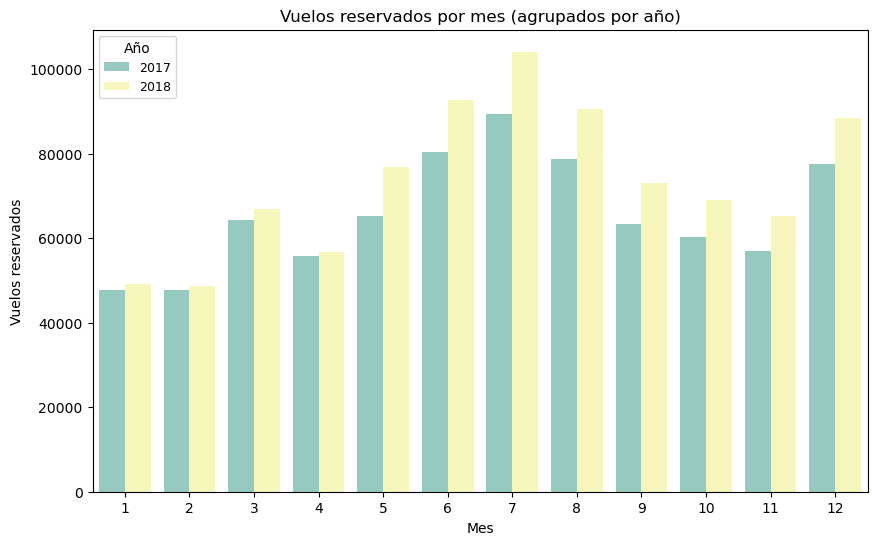

In [126]:
## Gráfico de barras para representar los vuelos reservados por mes agrupados por año: 

plt.figure(figsize=(10, 6)) 
sns.barplot(data=vuelos_por_mes, x="month", y="flights_booked", hue="year", palette="Set3")
plt.title("Vuelos reservados por mes (agrupados por año)")
plt.legend(title='Año', title_fontsize='10', fontsize='9', loc='upper left')
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados");

Conclusión: 
- Las reservas del año 2018 superan a las del año 2017. 
- A principios del año hay menos reservas de vuelos. 
- Los meses de verano --ya que el país es Canada-- tienen un aumento de reservas, así como también se observa un aumento en el mes de diciembre. 



#### 2) ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [ ]:
## Verificamos los datos de cada columna: 

In [105]:
df_final['distance'].unique()

array([1521, 2030, 1200, ..., 1217,  617, 4135])

In [107]:
df_final['points_accumulated'].unique()

array([152.  , 203.  , 120.  , ...,  18.75, 601.  , 626.  ])

Text(0, 0.5, 'Puntos acumulados')

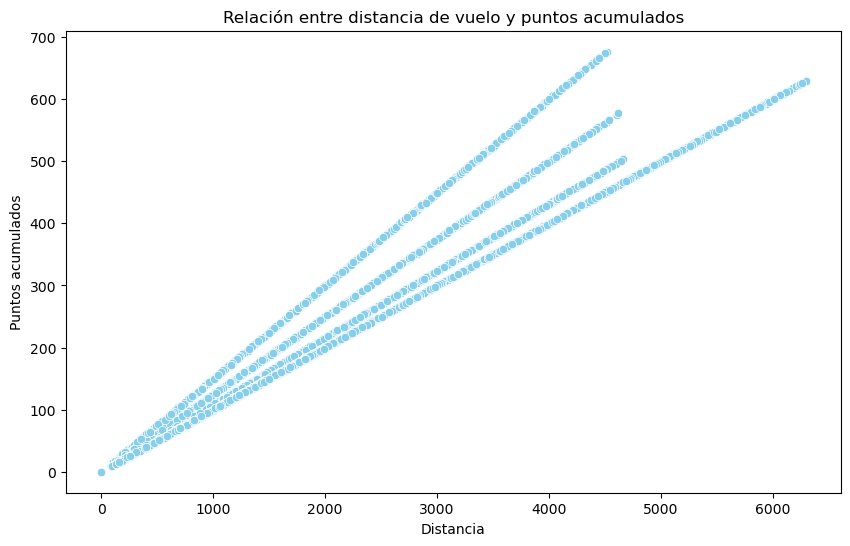

In [134]:
## Hacemos un scatterplot para visualizar la relación entre la distancia de vuelo y los puntos acumulados, para ver que tan dispersos están esos datos y ver si hay una relación visible. 

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_final, x='distance', y='points_accumulated', color='skyblue')
plt.title('Relación entre distancia de vuelo y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')


Conclusión: 
- El gráfico muestra que a mayor distancia del vuelo, más puntos acumulados. 
- Parece haber una relación lineal entre las variables (cuanto más largo es el vuelo, más puntos se obtienen)

#### 3) ¿Cuál es la distribución de los clientes por provincia o estado?

In [116]:
## Verificamos los datos únicos en la columna de provincia: 

In [115]:
df_final['province'].unique()

array(['Alberta', 'Ontario', 'British Columbia', 'Saskatchewan', 'Quebec',
       'Newfoundland', 'Manitoba', 'New Brunswick', 'Nova Scotia',
       'Prince Edward Island', 'Yukon'], dtype=object)

In [ ]:
## Hacemos un DF agrupando a los clientes según su provincia: 
df_province = df_final.groupby('province')['loyalty_number'].count().reset_index()

In [ ]:
## Creamos gráficos basándonos en el DF que hemos creado en el paso anterior:

Text(0.5, 1.0, 'Distribución de clientes por provincia')

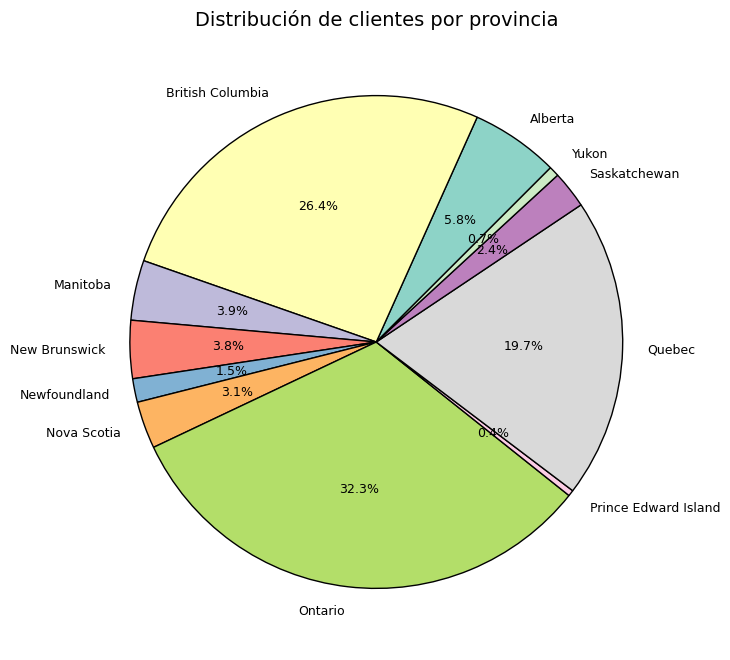

In [150]:
## Pie chart: 
colores = sns.color_palette("Set3", n_colors=12)


plt.figure(figsize=(8,8))
plt.pie("loyalty_number", labels= "province",
        data = df_province, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 9}, 
        startangle=45,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Distribución de clientes por provincia', fontsize=14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Alberta'),
  Text(1, 0, 'British Columbia'),
  Text(2, 0, 'Manitoba'),
  Text(3, 0, 'New Brunswick'),
  Text(4, 0, 'Newfoundland'),
  Text(5, 0, 'Nova Scotia'),
  Text(6, 0, 'Ontario'),
  Text(7, 0, 'Prince Edward Island'),
  Text(8, 0, 'Quebec'),
  Text(9, 0, 'Saskatchewan'),
  Text(10, 0, 'Yukon')])

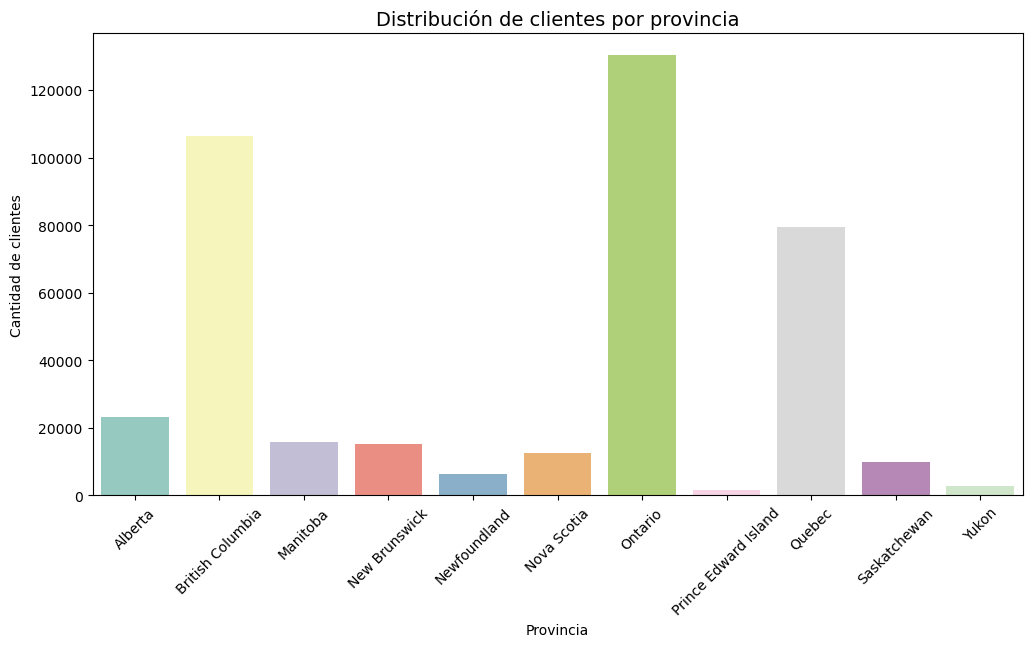

In [151]:
## Bar chart: 

plt.figure(figsize=(12,6))
sns.barplot(x='province', y='loyalty_number', data=df_province, palette='Set3')
plt.title('Distribución de clientes por provincia', fontsize=14)
plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)

Conclusión: 
- La mayoría de los clientes son de las provincias de Ontario, Quebec y British Columbia
- La minoría de los clientes son de las provincias de Prince Edward Island, Yukon y Newfoundland 

#### 4) ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [157]:
## Verificamos los datos agrupando por el nivel educativo de los clientes y calculando el salario promedio de cada grupo.

df_final.groupby('education')['salary'].mean()


education
Bachelor                 72599.080913
College                  79371.730000
Doctor                  178403.675202
High School or Below     61146.378165
Master                  103734.523724
Name: salary, dtype: float64

In [160]:
## Creamos gráficos para visualizar los datos:

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'High School or Below'),
  Text(4, 0, 'Doctor')])

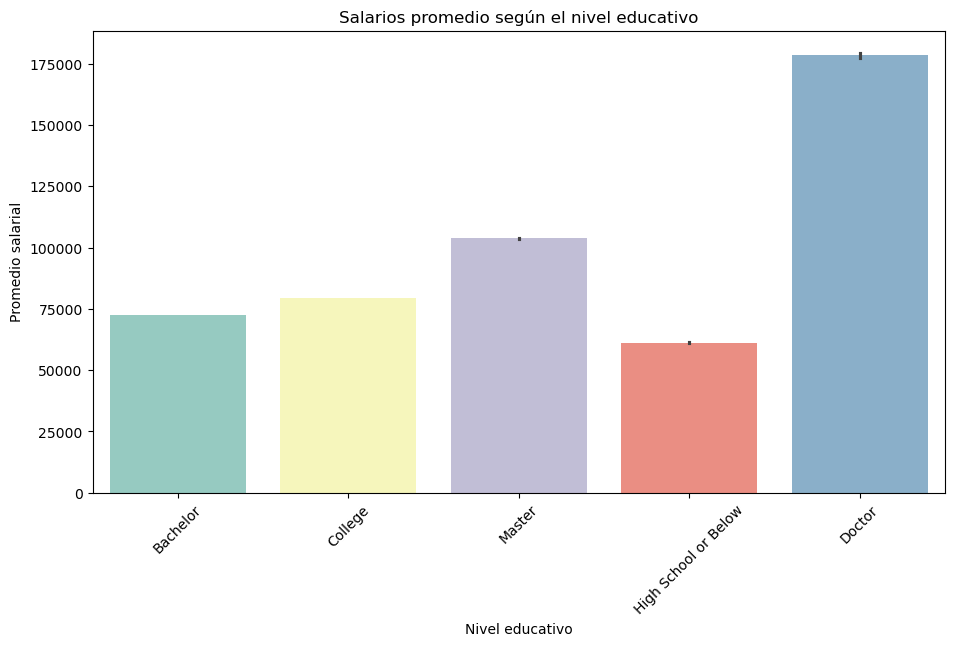

In [158]:
## Gráfico de barras: 

plt.figure(figsize=(11,6))
sns.barplot(x='education', y='salary', data=df_final, palette='Set3')
plt.title('Salarios promedio según el nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Promedio salarial')
plt.xticks(rotation=45)


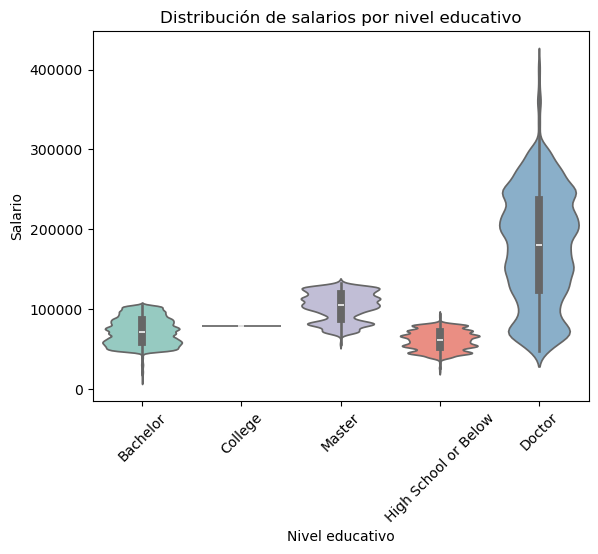

In [ ]:
## Violin Plot: 

sns.violinplot(x='education', y='salary', data=df_final, palette='Set3')

# Títulos y etiquetas
plt.title('Distribución de salarios por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()


Conclusión: 
- Para Bachelor, la distribución es compacta y parecen ser salarios no muy elevados ni muy variados. 
- En el caso de Collegue no hay dispersion (ya que los datos eran nulos). 
- En el caso de Master, la distribución parece ser más ancha-dispersa, y la mediana es un poco más alta que la de Bachelor. 
- Para el tipo high school, los salarios parecen no estar muy dispersos y se encuentran en un rango inferior. 
- Para la categoría Doctor, el violin es mas amplio, por lo que habría una mayor variedad de salarios en ese grupo. La mediana es mucho más alta que la del resto de las categorías. 

#### 5) ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [163]:
## Creamos un DF para agrupar los datos de la columna de tarjeta de fidelidad y contamos cuántos clientes hay para cada tipo de tarjeta. 

df_fidelidad = df_final.groupby('loyalty_card')['loyalty_number'].count().reset_index()
df_fidelidad

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


Text(0.5, 1.0, 'Proporción de clientes con diferentes tipos de tarjetas de fidelidad')

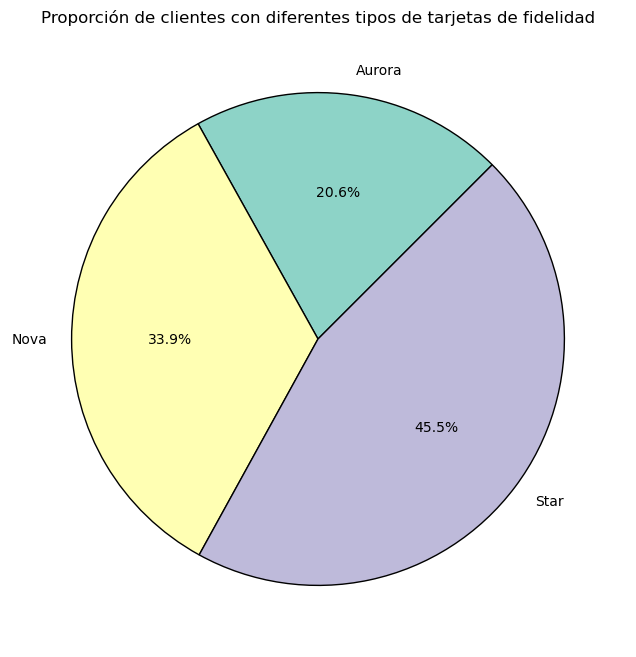

In [167]:
## Hacemos un gráfico para indicar el porcentaje de clientes según cada tipo de tarjeta de fidelidad: 

plt.figure(figsize=(8,8))
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_fidelidad, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 10}, 
        startangle=45, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Proporción de clientes con diferentes tipos de tarjetas de fidelidad', fontsize=12)

Conclusión: 
- El tipo de tarjeta de fidelidad con mayor cantidad de usuarios es 'Star' con un 45% del total. Luego le sigue el tipo 'Nova' con un 33% y finalmente 'Aurora' con un 20%. 

#### 6) . ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
## Verificamos los datos de las columnas: 

In [172]:
df_final['marital_status'].value_counts()

marital_status
Married     234845
Single      108153
Divorced     60762
Name: count, dtype: int64

In [173]:
df_final['gender'].value_counts()

gender
Female    202757
Male      201003
Name: count, dtype: int64

In [ ]:
## Representamos por medio de un gráfico para contar el número de ocurrencias de un valor en una categoria (cuántos clientes hay en cada estado civil, separados por género).

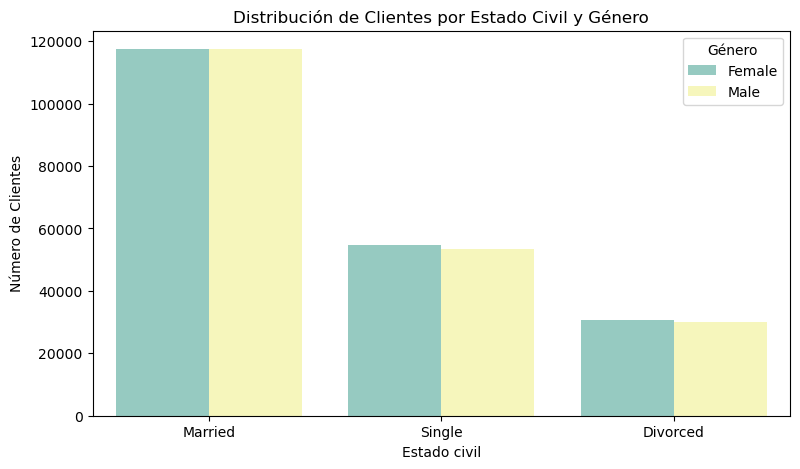

In [ ]:
## Countplot 

plt.figure(figsize=(9,5))

sns.countplot(x="marital_status", hue="gender", data=df_final, dodge=True, palette="Set3")

# Añadir título y etiquetas
plt.title("Distribución de Clientes por Estado Civil y Género")
plt.xlabel("Estado civil")
plt.ylabel("Número de Clientes")
plt.legend(title='Género')

Conclusión: 
- La mayor cantidad de clientes es de estado civil casada, y tanto mujeres como hombres están representados en cantidades similares.
- La distribución para el estado civil soltero también tiene es bastante equilibrada entre hombres y mujeres, aunque con una ligera predominancia de mujeres.
- En el caso de la categoría divorciado, la distribución por género también es bastante equilibrada, y es la categoría con menor número de clientes. 